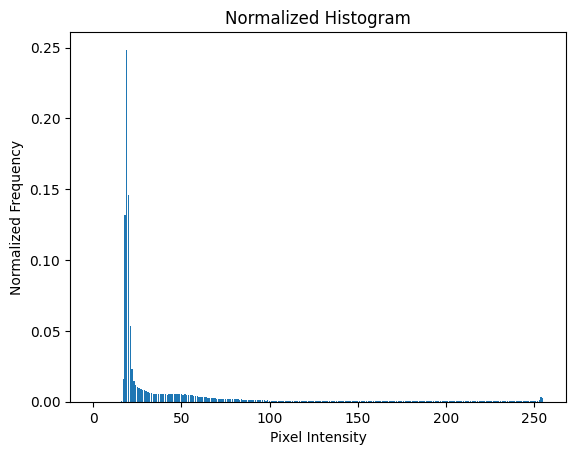

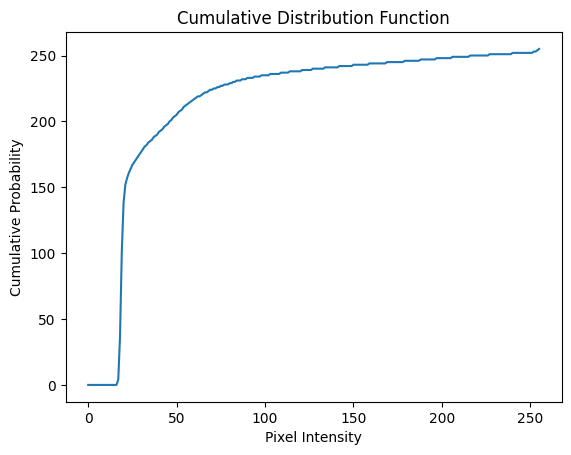

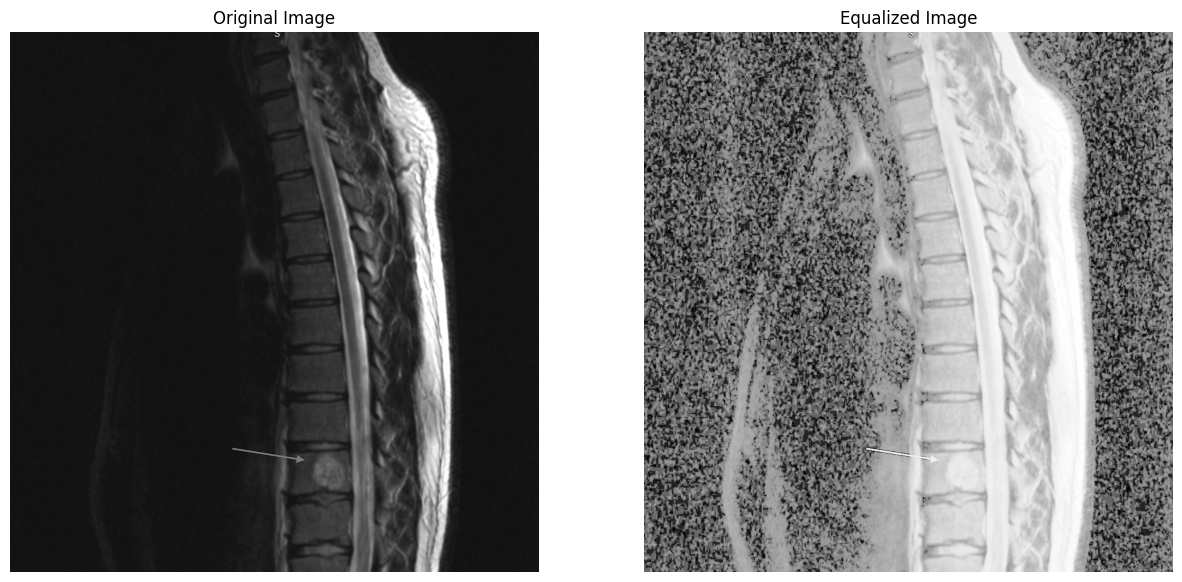

In [3]:
# Import necessary libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image file and convert it to grayscale
img = cv2.imread("/path/to/image.jpg")  # Load the image
if img is None:  # Check if the image was loaded correctly
    raise FileNotFoundError("Image not found. Check the file path.")

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert the image to grayscale
img = np.asarray(img)  # Convert the image to a NumPy array
pic = img.flatten()  # Flatten the image array for histogram calculation

def histogram(image, n):
    """
    Compute the normalized histogram of the grayscale image.

    Parameters:
        image (np.ndarray): The input image flattened into a 1D array.
        n (int): The total number of pixels in the image.

    Returns:
        np.ndarray: The normalized histogram of the image.
    """
    histogram = np.zeros(256)  # Initialize a histogram with 256 bins (for pixel values 0-255)

    # Count the occurrences of each pixel value in the image
    for pixel in image:
        histogram[pixel] += 1

    # Normalize the histogram by dividing by the total number of pixels
    for i in range(0, len(histogram)):
        histogram[i] = (histogram[i] / n)

    return histogram  # Return the normalized histogram

def histogram_equalization(histogram):
    """
    Perform histogram equalization based on the input histogram.

    Parameters:
        histogram (np.ndarray): The normalized histogram of the image.

    Returns:
        np.ndarray: The cumulative distribution function (CDF) used for equalization.
    """
    cumsum = np.zeros(256)  # Initialize cumulative sum array
    cumsum[0] = histogram[0]  # Set the first value of CDF

    # Compute the cumulative sum of the histogram
    for i in range(1, 256):
        cumsum[i] = cumsum[i-1] + histogram[i]

    # Normalize the cumulative sum to map pixel values to the range [0, 255]
    cs = ((cumsum - cumsum.min()) * 255) / (cumsum.max() - cumsum.min())
    cs = cs.astype('uint8')  # Convert to uint8 type for image representation

    return cs  # Return the mapping array for equalization

# Compute the histogram of the image
hist = histogram(pic, len(pic))
plt.bar(np.arange(len(hist)), hist)  # Plot the histogram
plt.title('Normalized Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Normalized Frequency')
plt.show()  # Show the histogram plot

# Apply histogram equalization to the computed histogram
cs = histogram_equalization(hist)
plt.plot(cs)  # Plot the cumulative distribution function
plt.title('Cumulative Distribution Function')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Probability')
plt.show()  # Show the CDF plot

# Map the original pixel values using the equalization mapping
result = cs[pic]  # Equalize the original image based on the CDF
result = np.reshape(result, img.shape)  # Reshape the result back to the original image dimensions
result = result.astype(np.uint8)  # Ensure the result is of type uint8 for image display

# Create a new figure for displaying images
fig = plt.figure()
fig.set_figheight(15)  # Set the height of the figure
fig.set_figwidth(15)   # Set the width of the figure

# Display the original image on the left
fig.add_subplot(1, 2, 1)  # Create a subplot for the original image
plt.imshow(img, cmap='gray')  # Display the original image in grayscale
plt.title('Original Image')  # Title for the original image
plt.axis('off')  # Hide axes for a cleaner view

# Display the equalized image on the right
fig.add_subplot(1, 2, 2)  # Create a subplot for the equalized image
plt.imshow(result, cmap='gray')  # Display the equalized image in grayscale
plt.title('Equalized Image')  # Title for the equalized image
plt.axis('off')  # Hide axes for a cleaner view

plt.show(block=True)  # Show both images